# Evolutionary Algorithm Analysis

Import the libraries

In [1]:
import os
os.chdir('../../')
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt

Set the parameters

In [2]:
filename = './results/EA_individuals_mfgoc_10.csv'
number_of_parameters = 4
number_of_features = 2
parameters_to_plot_2D = [0,3]
selected_individuals = 10
min_parameter_values = numpy.array([1.0e-12,1.0,1.0,1.0e-12])
max_parameter_values = numpy.array([3.0e-11,2.5,2.5,3.0e-11])
labels = ['GrC-GoC Max Weight (nS)', 'GrC-GoC LTD/LTP ratio', 'MF-GoC LTD-LTP ratio', 'MF-GoC Max Weight (nS)']

Read the file and load the EA data

In [3]:
data = numpy.loadtxt(filename)
print 'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
parameters = data[:,:number_of_parameters]
output = data[:,number_of_parameters:]
hall_of_fame = numpy.argsort(output[:,0])[-selected_individuals:][::-1]
print 'Hall of fame:'
for pos, best_id in enumerate(hall_of_fame):
    print pos+1,". Parameters:",parameters[best_id,:],"Features:",output[best_id,:]

Loaded 6 columns and 66 rows
Hall of fame:
1 . Parameters: [6.44622038e-12 1.87830547e+00 2.06785333e+00 1.86819570e-11] Features: [0.23362595 0.08022064]
2 . Parameters: [3.21831177e-12 2.00209360e+00 1.75103671e+00 1.93091220e-11] Features: [0.14570121 0.06516522]
3 . Parameters: [5.09103534e-12 1.99479534e+00 1.34783256e+00 2.11079619e-11] Features: [0.1439464  0.05242901]
4 . Parameters: [1.06357065e-11 1.86263683e+00 1.54655113e+00 2.92028519e-11] Features: [0.13842631 0.05769055]
5 . Parameters: [1.41108718e-11 2.12171481e+00 1.88269667e+00 1.37431250e-11] Features: [0.10856488 0.12376721]
6 . Parameters: [1.41518577e-11 1.96955124e+00 1.39809328e+00 1.08263542e-12] Features: [0.09909109 0.08955534]
7 . Parameters: [1.32184296e-11 2.15483369e+00 1.74148767e+00 2.69711495e-12] Features: [0.0920054  0.10330736]
8 . Parameters: [1.12218915e-11 1.75767073e+00 1.83659944e+00 7.65890265e-12] Features: [0.08802812 0.04626833]
9 . Parameters: [6.99228548e-12 2.05528903e+00 1.97974773e+00

Plot the parameter and output distribution

<IPython.core.display.Javascript object>


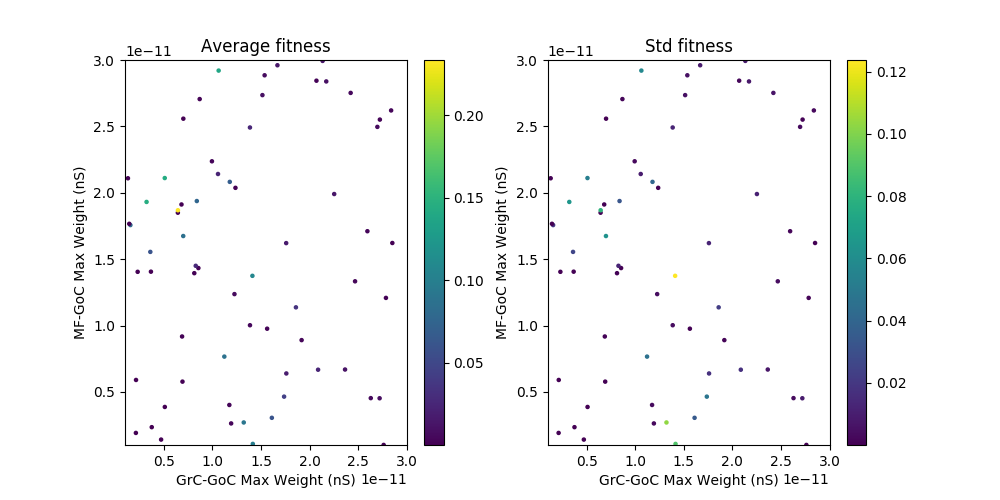

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,0])
plt.title('Average fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()
plt.subplot(1,2,2)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,1])
plt.title('Std fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()

Plot multiscale scaling of the parameters

<IPython.core.display.Javascript object>


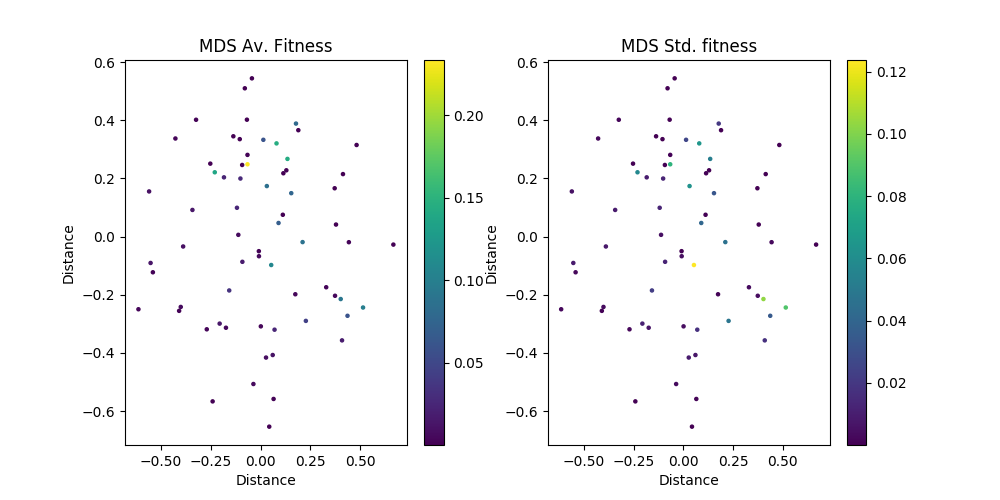

In [5]:
import sklearn.manifold
# Scale the parameters according to the search boundaries
scaled_parameters = (parameters-min_parameter_values)/(max_parameter_values-min_parameter_values)
mds = sklearn.manifold.MDS(number_of_parameters, max_iter=100, n_init=1)
Y = mds.fit_transform(scaled_parameters)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,0])
plt.title('MDS Av. Fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,1])
plt.title('MDS Std. fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.show()